# Big Brother - Healthcare edition

### Building a classifier using the [fastai](https://www.fast.ai/) library 



### Take 2 was when I tried to use SMOTE data in fastai
It worked miserably and the model instead started making a lot of 'High' predictions, I ended up abandoning the approach in favor of focal loss



In [1]:
from fastai.tabular import *

In [2]:
#hide
path = Path('./covid19_ml_education')

In [4]:
#hide
df = pd.read_csv('processed_over.csv')

## Independent variable

This is the value we want to predict

In [9]:
y_col = 'urgency'

## Dependent variable

The values on which we can make a prediciton

In [10]:
cat_names = ['sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache', 'fatigue']

In [11]:
cont_names = ['age']

In [12]:
#hide
procs = [FillMissing, Categorify, Normalize]

In [13]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs = procs)
         .split_by_rand_pct(0.2)
         .label_from_df(cols=y_col)
         .databunch()   )

In [14]:
data.show_batch(rows=10)

sex,cough,fever,chills,sore_throat,headache,fatigue,age,target
0,0,0,0,0,0,0,-0.6605,1
0,0,0,0,0,0,0,1.2201,0
0,0,0,0,0,0,0,-0.8987,1
0,0,0,0,0,0,0,-0.8334,1
1,0,0,0,0,0,0,-2.2896,1
1,0,0,0,0,0,0,2.1281,0
1,0,0,0,0,0,0,-1.1887,1
0,0,0,0,1,0,0,0.3120,0
1,0,0,0,0,0,0,0.1917,1
0,0,1,0,0,0,0,-1.0351,1


## Model

Here we build our machine learning model that will learn from the dataset to classify between patients

In [32]:
learn = tabular_learner(data, layers = [200,100], metrics = accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


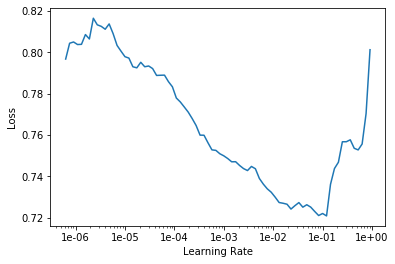

In [33]:
#hide
learn.lr_find(); learn.recorder.plot()

In [35]:
#hide
learn.fit(10, 1e-4, wd = 0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.631361,0.571644,0.701493,00:00
1,0.620900,0.568473,0.696517,00:00
2,0.622871,0.566279,0.696517,00:00
3,0.618744,0.561657,0.701493,00:00
4,0.617011,0.562929,0.711443,00:00
5,0.615939,0.560144,0.706468,00:00
6,0.616815,0.556878,0.701493,00:00
7,0.615605,0.553944,0.706468,00:00
8,0.613481,0.555494,0.706468,00:00
9,0.614007,0.554100,0.706468,00:00


In [54]:
testdf = pd.read_csv('processed_over_test.csv')

In [55]:
testdf = testdf.iloc[:,1:]

In [57]:
testdf.urgency.value_counts()

0    123
1     45
Name: urgency, dtype: int64

In [58]:
#hide
testdf.insert(0, 'predictions','')

In [59]:
#hide
for i in range(len(testdf)):
    row = testdf.iloc[i][1:]
    testdf.predictions.iloc[i] = int(learn.predict(row)[0])

### Making predictions

We've taken out a test set to see how well our model works, by making predictions on them.

Interestingly, all those predicted with 'High' urgency have a common trait of absence of **chills** and **sore throat**

In [60]:
testdf.predictions.value_counts()

1    84
0    84
Name: predictions, dtype: int64

In [61]:
#hide
testdf.columns

Index(['predictions', 'age', 'sex', 'cough', 'fever', 'chills', 'sore_throat',
       'headache', 'fatigue', 'urgency'],
      dtype='object')

In [66]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(testdf.predictions, testdf.urgency)
print(cm_test)

[[65 19]
 [58 26]]


In [67]:
print(f'Accuracy for test set for Logistic Regression = {(cm_test[0][0] + cm_test[1][1])/len(df.urgency)}')

Accuracy for test set for Logistic Regression = 0.09045725646123261


In [62]:
from sklearn.metrics import classification_report
print(classification_report(testdf.predictions, testdf.urgency))

              precision    recall  f1-score   support

           0       0.53      0.77      0.63        84
           1       0.58      0.31      0.40        84

    accuracy                           0.54       168
   macro avg       0.55      0.54      0.52       168
weighted avg       0.55      0.54      0.52       168

